In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import math
warnings.filterwarnings('ignore')

#reading the csv file
file = pd.read_csv("/Users/admin/Documents/Manipal/MRM/titanic.csv")
tester = pd.read_csv("/Users/admin/Documents/Manipal/MRM/titanic.csv")
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


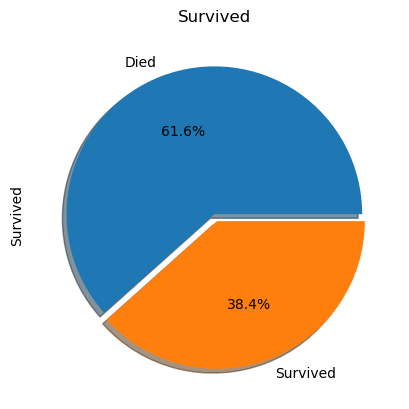

In [2]:
#visualizing male vs female survival rate
labels = ["Died", "Survived"]
file['Survived'].value_counts().plot.pie(explode=[0,0.05], labels=labels,autopct='%1.1f%%',shadow=True)
plt.title('Survived')
plt.show()

In [3]:
file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#checking for common surnames
surname = file['Name'].apply(lambda x : x.split(',')[0])
file.insert(3,"surname",surname)
file.drop(['Name'],axis=1,inplace=True)
file.head()

,PassengerId,Survived,Pclass,surname,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
file.surname.unique()

array(['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'Moran',
       'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell',
       'Saundercock', 'Andersson', 'Vestrom', 'Hewlett', 'Rice',
       'Williams', 'Vander Planke', 'Masselmani', 'Fynney', 'Beesley',
       'McGowan', 'Sloper', 'Asplund', 'Emir', 'Fortune', "O'Dwyer",
       'Todoroff', 'Uruchurtu', 'Spencer', 'Glynn', 'Wheadon', 'Meyer',
       'Holverson', 'Mamee', 'Cann', 'Nicola-Yarred', 'Ahlin', 'Turpin',
       'Kraeff', 'Laroche', 'Devaney', 'Rogers', 'Lennon', "O'Driscoll",
       'Samaan', 'Arnold-Franchi', 'Panula', 'Nosworthy', 'Harper',
       'Faunthorpe', 'Ostby', 'Woolner', 'Rugg', 'Novel', 'West',
       'Goodwin', 'Sirayanian', 'Icard', 'Harris', 'Skoog', 'Stewart',
       'Moubarek', 'Nye', 'Crease', 'Kink', 'Jenkin', 'Hood',
       'Chronopoulos', 'Bing', 'Moen', 'Staneff', 'Moutal', 'Caldwell',
       'Dowdell', 'Waelens', 'Sheerlinck', 'McDermott', 'Carrau', 'Ilett',
       'Backstrom

In [6]:
#since no surname is common, drop the column
file.drop(["surname"],axis=1,inplace=True)
file.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
file.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Cabin,204,147,B96 B98,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#categorizing the ages into sections
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
file['Age'] = pd.cut(file['Age'], bins = bins, labels=labels)

In [9]:
pd.DataFrame(file['Age'].value_counts())

,Age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [10]:
#checking for null values
pd.isnull('Age')

False

In [11]:
file.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,Young,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,Adult,1,0,113803,53.1000,C123,S
4,5,0,3,male,Adult,0,0,373450,8.0500,NaN,S


In [12]:
file.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [13]:
pd.DataFrame(file['Embarked'].value_counts())

,Embarked
S,644
C,168
Q,77


In [14]:
pd.isnull('Embarked')

False

In [15]:
file.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
file['Cabin'] = file['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else np.nan)
file.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,Young,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,Adult,1,0,PC 17599,71.2833,C,C
2,3,1,3,female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,Adult,1,0,113803,53.1000,C,S
4,5,0,3,male,Adult,0,0,373450,8.0500,NaN,S


[Text(0.5, 0, 'Fare'), Text(0, 0.5, 'Frequency of Fare')]

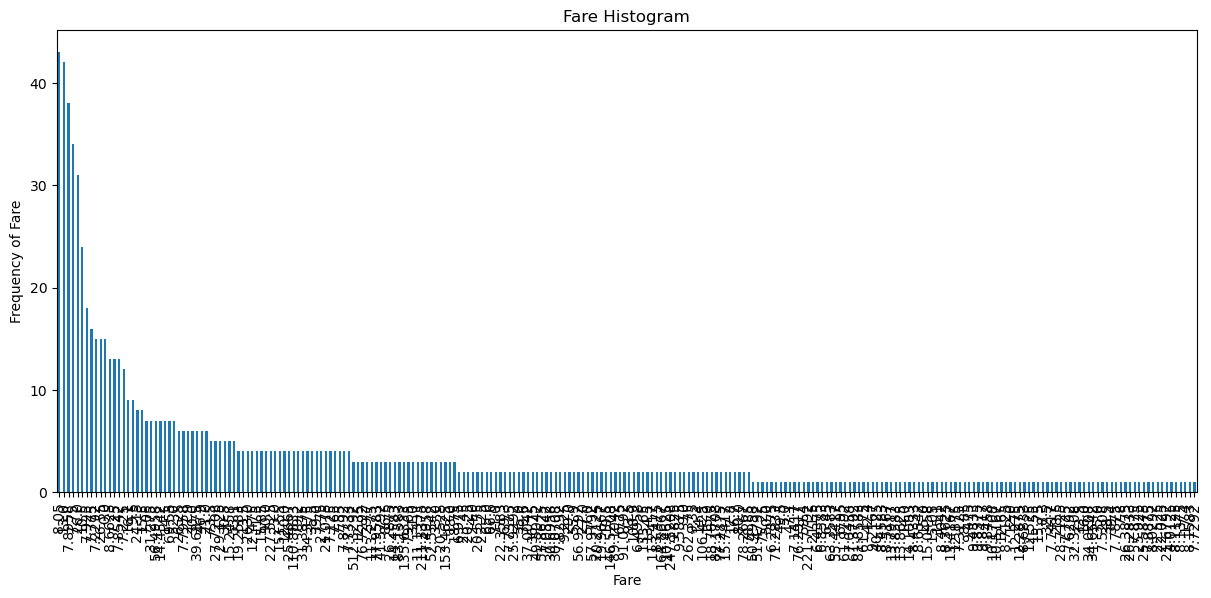

In [17]:
plt.figure(figsize=(50, 6))
plt.subplot(1,3,2)
file1 = file.sort_values('Fare')
plt1 = file1.Fare.value_counts().plot(kind ='bar')
plt.title('Fare Histogram')
plt1.set(xlabel = 'Fare', ylabel='Frequency of Fare')

In [18]:
file['Fare'].max()


512.3292

In [19]:
file['Fare'].min()

0.0

In [20]:
bins = [0.0, 8.0, 15.0, 31.0, 512.33]
labels = ['low', 'midlow', 'mid', 'high']
file['Fare'] = pd.cut(file["Fare"], bins = bins, labels = labels)

In [21]:
file.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,Young,1,0,A/5 21171,low,NaN,S
1,2,1,1,female,Adult,1,0,PC 17599,high,C,C
2,3,1,3,female,Adult,0,0,STON/O2. 3101282,low,NaN,S
3,4,1,1,female,Adult,1,0,113803,high,C,S
4,5,0,3,male,Adult,0,0,373450,midlow,NaN,S


In [22]:
file.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [23]:
#since no Ticket is common, drop the column
file.drop(["Ticket"],axis=1,inplace=True)
file.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,Young,1,0,low,NaN,S
1,2,1,1,female,Adult,1,0,high,C,C
2,3,1,3,female,Adult,0,0,low,NaN,S
3,4,1,1,female,Adult,1,0,high,C,S
4,5,0,3,male,Adult,0,0,midlow,NaN,S


In [24]:
def dummies(x,file):
    temp = pd.get_dummies(file[x], drop_first = True)
    file = pd.concat([file, temp], axis = 1)
    file.drop([x], axis = 1, inplace = True)
    return file

file = dummies('Sex',file)
file = dummies('Age',file)
file = dummies('Embarked',file)
file = dummies('Cabin' ,file)
file = dummies('Fare' ,file)

In [25]:
file.head()

,PassengerId,Survived,Pclass,SibSp,Parch,male,Kid,Young,Adult,Old,...,B,C,D,E,F,G,T,midlow,mid,high
0,1,0,3,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,3,1,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,5,0,3,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
file.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,male,Kid,Young,Adult,Old,...,B,C,D,E,F,G,T,midlow,mid,high
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,0.647587,0.077441,0.210999,0.391695,0.071829,...,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.243547,0.236813,0.249158
std,257.353842,0.486592,0.836071,1.102743,0.806057,0.477990,0.267440,0.408247,0.488403,0.258350,...,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.429463,0.425365,0.432769
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
file.corr()

,PassengerId,Survived,Pclass,SibSp,Parch,male,Kid,Young,Adult,Old,...,B,C,D,E,F,G,T,midlow,mid,high
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652,0.042939,-0.005795,-0.001208,0.035668,-0.002298,...,0.069552,-0.040957,0.022828,0.042351,-0.035772,-0.060049,-0.013814,-0.012372,-0.037012,0.009110
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629,-0.543351,0.030350,-0.051820,0.047470,-0.022932,...,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.026456,-0.114486,0.097768,0.233638
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443,0.131900,0.099012,0.092091,-0.169819,-0.253606,...,-0.369572,-0.417048,-0.278690,-0.230091,0.011063,0.055561,-0.052496,0.190962,-0.073056,-0.579206
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838,-0.114631,0.205399,-0.085670,-0.128364,-0.068910,...,-0.034538,0.029251,-0.017575,-0.036865,0.001706,-0.001402,-0.015907,-0.207578,0.128501,0.324653
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000,-0.245489,0.170281,-0.060571,-0.049022,-0.029255,...,0.056498,0.030736,-0.019125,-0.016554,0.023694,0.072388,-0.015878,-0.187625,0.165437,0.297252
male,0.042939,-0.543351,0.131900,-0.114631,-0.245489,1.000000,-0.085113,-0.004297,0.004775,0.050538,...,-0.109689,-0.058649,-0.079248,-0.047003,-0.008202,-0.091031,0.024728,0.057327,-0.080909,-0.177966
Kid,-0.005795,0.030350,0.099012,0.205399,0.170281,-0.085113,1.000000,-0.149827,-0.232489,-0.080598,...,0.044336,-0.043381,-0.034586,-0.033354,-0.035254,-0.019456,-0.009712,0.001910,0.006518,0.066093
Young,-0.001208,-0.051820,0.092091,-0.085670,-0.060571,-0.004297,-0.149827,1.000000,-0.414968,-0.143859,...,0.001022,-0.038152,0.000539,-0.055464,0.005896,0.006419,-0.017334,0.065452,-0.132776,-0.062590
Adult,0.035668,0.047470,-0.169819,-0.128364,-0.049022,0.004775,-0.232489,-0.414968,1.000000,-0.223229,...,0.026644,0.063709,0.025252,0.104607,-0.020940,-0.019493,0.041773,0.053580,0.039765,0.026812
Old,-0.002298,-0.022932,-0.253606,-0.068910,-0.029255,0.050538,-0.080598,-0.143859,-0.223229,1.000000,...,0.089915,0.065762,0.129573,0.063105,-0.033850,-0.018681,-0.009325,-0.026198,0.018854,0.111086


In [28]:
#dropping all columns with negative relation and Survived
file = file.drop(["PassengerId"], axis=1)
file = file.drop(["Pclass"], axis=1)
file = file.drop(["SibSp"], axis=1)
file = file.drop(["male"], axis=1)
file = file.drop(["Young"], axis=1)
file = file.drop(["Old"], axis=1)
file = file.drop(["S"], axis=1)
file = file.drop(["T"], axis=1)
file = file.drop(["midlow"], axis=1)
file.head()

,Survived,Parch,Kid,Adult,Q,B,C,D,E,F,G,mid,high
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0


In [29]:
def sigmoid(z):
    np.where (z>=0)
    return 1.0/(1 + np.exp(-z))
    return 1.0/(1 + np.exp(z))

In [30]:
#optimising the weights & producing predicted values
class LogisticRegression:

    def __init__(self, lr=0.05, n=10):
        self.lr=lr
        self.n= n
        self.weights= None
        self.base= None

    def optimize(self, x, y):
        samples, features = x.shape
        self.weights = np.zeros(features)
        self.bias=0

        for i in range(self.n):   
            y_pred = sigmoid(np.dot(x,self.weights) + self.bias) #Hypothesis function y = mx + c, where x is weights and c is bias
            dw = (1/samples)*np.dot(x.T, (y_pred - y))
            db = (1/samples)*np.sum((y_pred - y))
            #Trains the weights and biases to new values with each iteration
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            return y_pred
        
    def predict(self, x):
        y_pred = sigmoid(np.dot(x,self.weights) + self.bias)
        # Empty List to store predictions.
        pred_class = []
        # if y_pred >= 0.5 --> round up to 1
        # if y_pred < 0.5 --> round up to 1
        pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(pred_class)
            
    

In [31]:
file.head()

,Survived,Parch,Kid,Adult,Q,B,C,D,E,F,G,mid,high
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0


In [32]:
x= file.loc[:, file. columns != 'Survived']
x

,Parch,Kid,Adult,Q,B,C,D,E,F,G,mid,high
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,0,0,0,0,0,0,0
887,0,0,0,0,1,0,0,0,0,0,1,0
888,2,0,0,0,0,0,0,0,0,0,1,0
889,0,0,1,0,0,1,0,0,0,0,1,0


In [33]:
y = file['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
#test-train split
train_size = int(0.8 * len(file))
x_train = x[:train_size]
x_test = x[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]
train_size

712

In [35]:
print("x train is", x_train)
print("Y train is", y_train)
print("X test is", x_test)
print("Y test is", y_test)

x train is      Parch  Kid  Adult  Q  B  C  D  E  F  G  mid  high
0        0    0      0  0  0  0  0  0  0  0    0     0
1        0    0      1  0  0  1  0  0  0  0    0     1
2        0    0      1  0  0  0  0  0  0  0    0     0
3        0    0      1  0  0  1  0  0  0  0    0     1
4        0    0      1  0  0  0  0  0  0  0    0     0
..     ...  ...    ... .. .. .. .. .. .. ..  ...   ...
707      0    0      1  0  0  0  0  1  0  0    1     0
708      0    0      0  0  0  0  0  0  0  0    0     1
709      1    0      0  0  0  0  0  0  0  0    1     0
710      0    0      0  0  0  1  0  0  0  0    0     1
711      0    0      0  0  0  1  0  0  0  0    1     0

[712 rows x 12 columns]
Y train is 0      0
1      1
2      1
3      1
4      0
      ..
707    1
708    1
709    1
710    1
711    0
Name: Survived, Length: 712, dtype: int64
X test is      Parch  Kid  Adult  Q  B  C  D  E  F  G  mid  high
712      0    0      1  0  0  1  0  0  0  0    0     1
713      0    0      1  0  0  0 

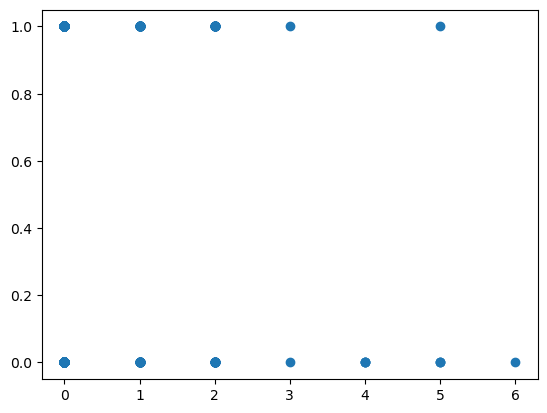

In [36]:
plt.scatter(x_train.iloc[:,0],y_train)

X train is          Parch       Kid     Adult        Q        B         C         D  \
0   -0.470152 -0.274825 -0.788586 -0.31427 -0.21693 -0.280692 -0.190762   
1   -0.470152 -0.274825  1.268093 -0.31427 -0.21693  3.562627 -0.190762   
2   -0.470152 -0.274825  1.268093 -0.31427 -0.21693 -0.280692 -0.190762   
3   -0.470152 -0.274825  1.268093 -0.31427 -0.21693  3.562627 -0.190762   
4   -0.470152 -0.274825  1.268093 -0.31427 -0.21693 -0.280692 -0.190762   
..        ...       ...       ...      ...      ...       ...       ...   
707 -0.470152 -0.274825  1.268093 -0.31427 -0.21693 -0.280692 -0.190762   
708 -0.470152 -0.274825 -0.788586 -0.31427 -0.21693 -0.280692 -0.190762   
709  0.760540 -0.274825 -0.788586 -0.31427 -0.21693 -0.280692 -0.190762   
710 -0.470152 -0.274825 -0.788586 -0.31427 -0.21693  3.562627 -0.190762   
711 -0.470152 -0.274825 -0.788586 -0.31427 -0.21693  3.562627 -0.190762   

            E         F         G       mid      high  
0   -0.186772 -0.125267 -0.0751

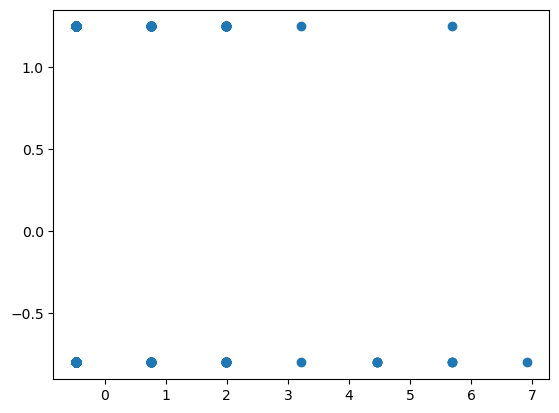

In [37]:
#feature scaling
x_train = (x_train - np.mean(x_train)) / (np.std(x_train))
x_test = (x_test - np.mean(x_test)) / ( np.std(x_test))
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)
print("X train is ", x_train)
print("X Test is ", x_test)
y_train = (y_train - np.mean(y_train)) / (np.std(y_train))
y_test = (y_test - np.mean(y_test)) / ( np.std(y_test))
y_train.fillna(np.mean(y_train), inplace=True)
y_test.fillna(np.mean(y_test), inplace=True)
print("Y train is ", y_train)
print("Y Test is ", y_test)
plt.scatter(x_train.iloc[:,0],y_train)

In [38]:
#calling the class
reg = LogisticRegression()
reg.optimize(x_train,y_train)
predictions = reg.predict(x_test)
print(predictions)

[1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
y_test

712    1.340476
713   -0.746004
714   -0.746004
715   -0.746004
716    1.340476
         ...   
886   -0.746004
887    1.340476
888   -0.746004
889    1.340476
890   -0.746004
Name: Survived, Length: 179, dtype: float64

In [40]:
# Empty List to store predictions.
pred_class = []
# if y_pred >= 0.5 --> round up to 1
# if y_pred < 0.5 --> round up to 1
pred_class = [1 if i > 0.5 else 0 for i in y_test]
y_test = np.array(pred_class)
y_test

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0])

In [41]:
def loss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-2, 1 - 1e-2) # clip predicted probabilities to avoid extreme values
    loss = -(np.mean(y*(np.log(y_pred)) - (1-y)*np.log(1-y_pred)))
    return loss

In [42]:
logloss = loss(y_test, predictions)
print(logloss)

0.8956236180233634


In [43]:
accuracy = (y_test == predictions).sum() / y_test.size
TP = ((predictions == 1) & (y_test == 1)).sum()                     # True positives
FP = ((predictions == 1) & (y_test == 0)).sum()                     # False positives
precision = TP / (TP+FP)
print(f'Accuracy: {accuracy}, Precision: {precision}')

Accuracy: 0.7374301675977654, Precision: 0.7931034482758621
